# GBM - Classification:

## Importing the required libraries:

In [568]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [570]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [571]:
df.shape

(1470, 35)

In [572]:
df.isnull().sum().any()

False

In [573]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [577]:
num_vars = df.select_dtypes(include='number')
cat_vars = df.select_dtypes(include='object')

In [579]:
num_vars.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [581]:
cat_vars.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [583]:
cat_vars = df[cat_vars.columns[1:]]

In [585]:
cat_vars.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

<Axes: >

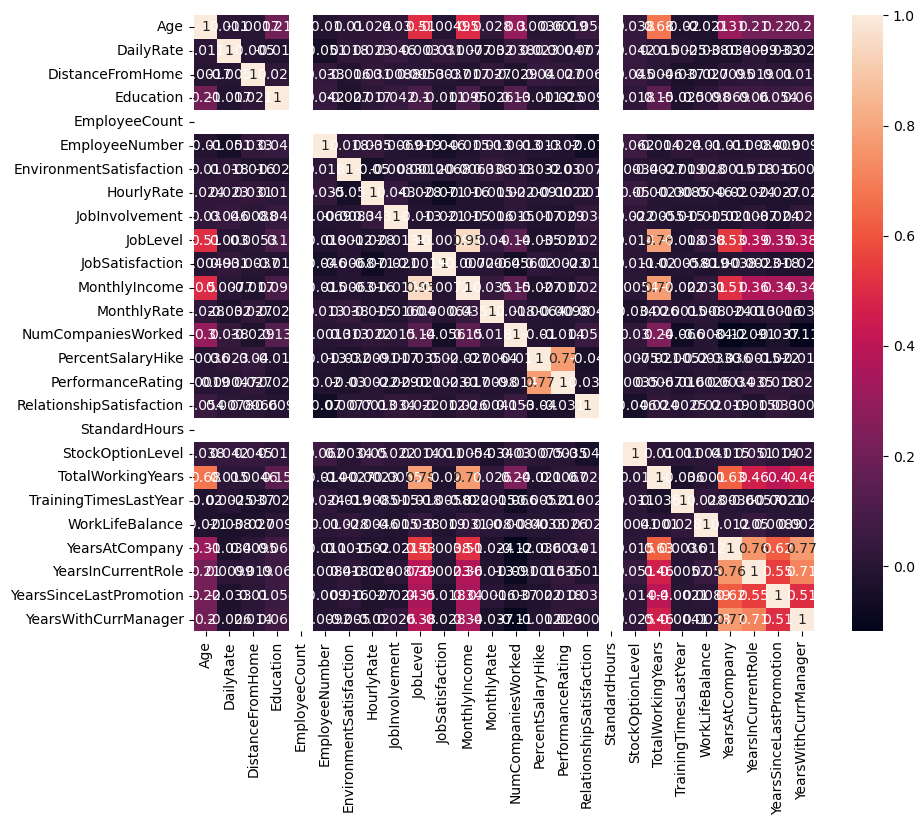

In [586]:
plt.figure(figsize=[10,8])
sns.heatmap(num_vars.corr(), annot=True)

### What are these blanks in the HeatMap?
If a column in your dataset contains the same value for all records, we will see a white line or a uniform color (depending on the color map) for that column in a Seaborn heatmap.

This happens because the heatmap uses color to represent variation in the values of each cell. When all values in a column are the same, there is no variation, so the heatmap displays a uniform color for that column. If our colormap assigns the "middle" or neutral color to that value, it can appear as a white (or consistent)

In [589]:
num_vars.EmployeeCount.value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [591]:
num_vars.StandardHours.value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [592]:
df['Attrition'] = df.Attrition.map({'Yes':1, 'No':0})
df.Attrition.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [593]:
num_vars.shape

(1470, 26)

In [594]:
df.shape

(1470, 35)

In [595]:
cat_vars.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [597]:
# cat_vars

In [599]:
dummies_df = pd.get_dummies(cat_vars, dtype='int')

In [600]:
dummies_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


__Note:__ dont ever pass just the column names to the pd.get_dummies. <br>
WE ONLY PASS THE DF (or SHIFT+Tab in the pd.get_dummies() function). <br>
READ THE DOCUMENTATION.

In [602]:
dummies_df.isnull().sum()

BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Human Resources           0
Department_Research & Development    0
Department_Sales                     0
EducationField_Human Resources       0
EducationField_Life Sciences         0
EducationField_Marketing             0
EducationField_Medical               0
EducationField_Other                 0
EducationField_Technical Degree      0
Gender_Female                        0
Gender_Male                          0
JobRole_Healthcare Representative    0
JobRole_Human Resources              0
JobRole_Laboratory Technician        0
JobRole_Manager                      0
JobRole_Manufacturing Director       0
JobRole_Research Director            0
JobRole_Research Scientist           0
JobRole_Sales Executive              0
JobRole_Sales Representative         0
MaritalStatus_Divorced               0
MaritalStatus_Married                0
MaritalStatus_Single     

In [603]:
df = df.drop(cat_vars.columns, axis=1)

In [604]:
df.shape

(1470, 27)

In [605]:
df = pd.concat([df, dummies_df], axis=1)
df.shape

(1470, 56)

In [606]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender

## Train test split:

In [608]:
y = df.pop('Attrition')
X = df

In [609]:
X.isnull().sum()

Age                                  0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeCount                        0
EmployeeNumber                       0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager     

In [627]:
cat_vars.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [629]:
y.head(2)

0    1
1    0
Name: Attrition, dtype: int64

In [630]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=42)

__NOTE: No scaling is reuiqred in Boosting Algos__

In [634]:
# # scaler = StandardScaler()
# Xtrain = scaler.fit_transform(Xtrain)
# Xtest = scaler.transform(Xtest)

__NOTE:__ SMOTE is applied after rescaling as it essential to apply SMOTE on rescaled features so the synthetic data is consistent with the original scaled data.

In [636]:
y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [639]:
ytrain.value_counts()

Attrition
0    853
1    176
Name: count, dtype: int64

In [641]:
smote = SMOTE()
Xtrain, ytrain = smote.fit_resample(Xtrain, ytrain)

## Imp Note on when to use the GridSearchCV:

**Note**: It is recommended to start with the default model parameters before applying GridSearchCV for hyperparameter tuning. This allows us to establish a baseline performance, understand the model's behavior, and identify any data-related issues. It also saves time and computational resources by focusing on tuning only if the default model does not meet performance expectations.


In [644]:
gbm_classifier = GradientBoostingClassifier(random_state=42) 

param_grid = {'loss' : ['log_loss', 'exponential'],
             'learning_rate' : [0.001, 0.01, 0.1, 0.5, 1],
             'n_estimators' : [100, 200, 300, 400, 450],
             'criterion' : ['friedman_mse', 'squared_error'],
             'max_depth' : [3,4,5],
             'min_samples_split': [2, 5],
             'min_samples_leaf': [1, 2],
             'subsample': [0.8, 0.9, 1.0],
             'max_features': ['auto', 'sqrt', 'log2']}

grid_model = GridSearchCV(estimator=gbm_classifier, 
                          param_grid=param_grid, 
                          scoring='f1', 
                          cv=5, 
                          verbose=1, 
                          return_train_score=True, 
                         n_jobs=-1)

In [646]:
%%time
grid_model.fit(Xtrain, ytrain)

Fitting 5 folds for each of 10800 candidates, totalling 54000 fits


D:\Anaconda_navigator\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
18000 fits failed out of a total of 54000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8129 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda_navigator\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda_navigator\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\Anaconda_navigator\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Anac

CPU times: total: 1min 11s
Wall time: 26min 14s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300, 400, 450],
                         'subsample': [0.8, 0.9, 1.0]},
             return_train_score=True, scoring='f1', verbose=1)

In [647]:
best_model = grid_model.best_estimator_

In [648]:
ytrain_pred = best_model.predict(Xtrain)
ytest_pred = best_model.predict(Xtest)

In [649]:
print(100*accuracy_score(ytrain, ytrain_pred))
print(100*accuracy_score(ytest, ytest_pred))

94.3728018757327
85.71428571428571


In [650]:
print(100*recall_score(ytrain, ytrain_pred))
print(100*recall_score(ytest, ytest_pred))

92.26260257913246
39.34426229508197


## Feature Importance:

In [652]:
best_model.feature_importances_

array([2.33070596e-02, 9.84687833e-03, 7.60738124e-03, 8.54707061e-03,
       0.00000000e+00, 1.10747278e-02, 2.55064871e-02, 7.04885024e-03,
       3.17044763e-02, 3.27201803e-02, 4.99082062e-02, 4.35553914e-02,
       1.06016161e-02, 8.77023541e-03, 4.21261398e-03, 5.76055138e-03,
       1.55638103e-02, 0.00000000e+00, 7.34097815e-02, 3.51044388e-02,
       1.57484747e-02, 1.63614319e-02, 2.96372681e-02, 4.15589891e-02,
       4.89242998e-03, 2.71528642e-02, 1.15720234e-02, 1.99452747e-03,
       1.19598631e-02, 9.22878806e-05, 3.43207966e-02, 8.95247460e-03,
       2.26518148e-04, 2.39575868e-02, 1.22799508e-03, 1.95671734e-02,
       1.98350475e-03, 8.18469861e-04, 2.06978466e-02, 1.21556665e-02,
       8.20214058e-03, 1.14834982e-03, 9.07237550e-04, 2.32832645e-03,
       3.93836575e-03, 3.72501018e-03, 3.13488059e-03, 4.93790538e-03,
       4.77549114e-04, 4.80217068e-02, 7.54871391e-02, 6.51114526e-03,
       0.00000000e+00, 1.42610947e-01, 9.44134717e-03])

## Visualizing the Feature Importance:

In [657]:
import plotly.graph_objs as go
import plotly.offline as py

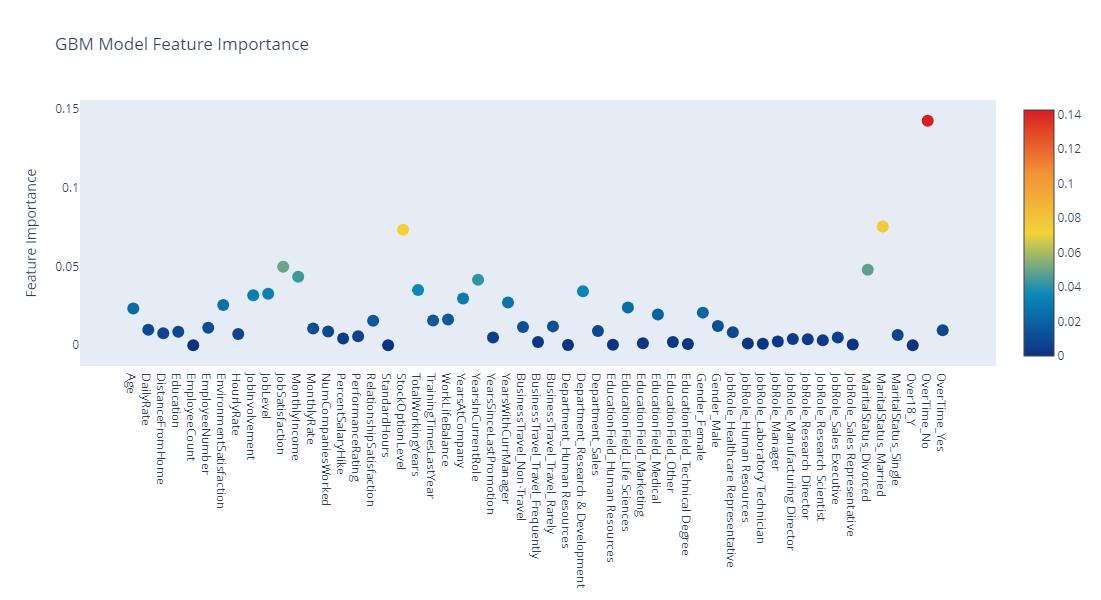

In [661]:
# Scatter plot 
trace = go.Scatter(
    y = best_model.feature_importances_,
    x = df.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1.3,
        size = 12,
        color = best_model.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = df.columns.values
)
data = [trace]

layout= go.Layout(
    height=600,
    autosize= True,
    title= 'GBM Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')